# UTS 1B - Klara Kelly (2702281014)

### Import libraries and load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Dataset_B_hotel.csv')

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.shape

(36275, 19)

In [6]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.isna().sum()

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64

In [9]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [10]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['booking_status'] = label_encoding.fit_transform(df['booking_status'])

In [11]:
df = df.drop('Booking_ID', axis = 1)

In [12]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


### Splitting the dataset (train and test)

In [13]:
input_df = df.drop('booking_status',axis=1)
output_df = df['booking_status']

Importing the library

In [14]:
from sklearn.model_selection import train_test_split

Splitting (80:20)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

Convert required_car_parking_space into int

In [16]:
x_train['required_car_parking_space'] = x_train['required_car_parking_space'].astype('Int64')
x_test['required_car_parking_space'] = x_test['required_car_parking_space'].astype('Int64')

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 26817 to 2732
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     28310 non-null  object 
 5   required_car_parking_space            27986 non-null  Int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_ty

In [18]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7255 entries, 16432 to 26894
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          7255 non-null   int64  
 1   no_of_children                        7255 non-null   int64  
 2   no_of_weekend_nights                  7255 non-null   int64  
 3   no_of_week_nights                     7255 non-null   int64  
 4   type_of_meal_plan                     7058 non-null   object 
 5   required_car_parking_space            7019 non-null   Int64  
 6   room_type_reserved                    7255 non-null   object 
 7   lead_time                             7255 non-null   int64  
 8   arrival_year                          7255 non-null   int64  
 9   arrival_month                         7255 non-null   int64  
 10  arrival_date                          7255 non-null   int64  
 11  market_segment_ty

### Impute missing value (categorical)

Checking the columns that has null values

In [19]:
x_train['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     21754
Not Selected     3957
Meal Plan 2      2594
Meal Plan 3         5
Name: count, dtype: int64

In [20]:
x_train['required_car_parking_space'].value_counts()

required_car_parking_space
0    27124
1      862
Name: count, dtype: Int64

Impute missing value with mode

In [21]:
x_train['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)
x_test['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)

C:\Users\Kelly\AppData\Local\Temp\ipykernel_24500\4095426347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)
C:\Users\Kelly\AppData\Local\Temp\ipykernel_24500\4095426347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [22]:
x_train['required_car_parking_space'].fillna(0, inplace=True)
x_test['required_car_parking_space'].fillna(0, inplace=True)

C:\Users\Kelly\AppData\Local\Temp\ipykernel_24500\2762307024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['required_car_parking_space'].fillna(0, inplace=True)
C:\Users\Kelly\AppData\Local\Temp\ipykernel_24500\2762307024.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [23]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
26817,2,0,2,3,Meal Plan 1,0,Room_Type 1,244,2018,10,30,Online,0,0,0,85.85,0
7537,2,0,0,3,Meal Plan 1,0,Room_Type 1,276,2018,9,22,Online,0,0,0,95.00,0
6217,2,0,1,2,Meal Plan 1,0,Room_Type 1,233,2018,10,14,Online,0,0,0,90.00,0
22883,2,0,2,2,Meal Plan 1,0,Room_Type 1,156,2018,7,2,Online,0,0,0,93.08,1
28669,2,0,0,3,Meal Plan 1,0,Room_Type 1,76,2018,4,12,Online,0,0,0,69.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1,0,2,5,Meal Plan 1,0,Room_Type 1,34,2018,11,14,Online,0,0,0,74.80,2
32103,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Offline,0,0,0,115.00,1
30403,3,0,0,4,Meal Plan 1,0,Room_Type 4,175,2018,8,2,Online,0,0,0,130.05,1
21243,1,0,0,3,Meal Plan 1,0,Room_Type 1,5,2017,12,1,Offline,0,0,0,64.80,0


### Impute missing value (numerical)

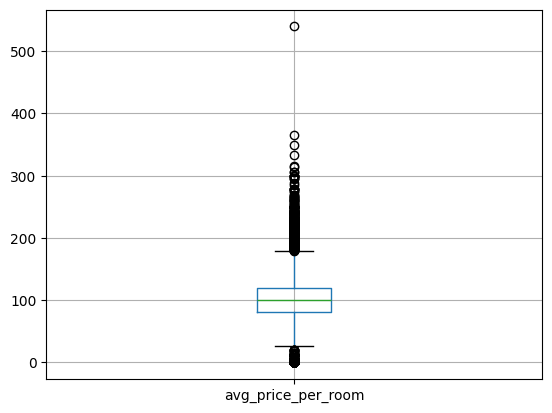

In [24]:
x_train.boxplot(column=['avg_price_per_room']) 
plt.show()

Since there is outliers, we use the median of the column to impute

In [25]:
medianavg = x_train['avg_price_per_room'].median()
print(medianavg)

99.45


In [26]:
x_train['avg_price_per_room'].fillna(99.45, inplace=True)
x_test['avg_price_per_room'].fillna(99.45, inplace=True)

C:\Users\Kelly\AppData\Local\Temp\ipykernel_24500\4261728811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['avg_price_per_room'].fillna(99.45, inplace=True)
C:\Users\Kelly\AppData\Local\Temp\ipykernel_24500\4261728811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 26817 to 2732
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  Int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_ty

In [28]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7255 entries, 16432 to 26894
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          7255 non-null   int64  
 1   no_of_children                        7255 non-null   int64  
 2   no_of_weekend_nights                  7255 non-null   int64  
 3   no_of_week_nights                     7255 non-null   int64  
 4   type_of_meal_plan                     7255 non-null   object 
 5   required_car_parking_space            7255 non-null   Int64  
 6   room_type_reserved                    7255 non-null   object 
 7   lead_time                             7255 non-null   int64  
 8   arrival_year                          7255 non-null   int64  
 9   arrival_month                         7255 non-null   int64  
 10  arrival_date                          7255 non-null   int64  
 11  market_segment_ty

### Encoding

One hot encoding to market_segment_type, type_of_meal_plan, room_type_reserved

In [29]:
x_train['market_segment_type'].value_counts()

market_segment_type
Online           18544
Offline           8437
Corporate         1631
Complementary      311
Aviation            97
Name: count, dtype: int64

In [30]:
x_train['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    22470
Room_Type 4     4835
Room_Type 6      779
Room_Type 2      571
Room_Type 5      225
Room_Type 7      134
Room_Type 3        6
Name: count, dtype: int64

In [31]:
x_train = pd.get_dummies(x_train, columns=['market_segment_type','type_of_meal_plan', 'room_type_reserved', ], drop_first=True) #to handle multicollineriality
x_test = pd.get_dummies(x_test, columns=['market_segment_type','type_of_meal_plan', 'room_type_reserved', ], drop_first=True)

Align x_test with x_train, fill missing columns with 0 for unseen categories

In [32]:
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

Label encoding for arrival_year column

In [33]:
x_train['arrival_year'] = label_encoding.fit_transform(x_train['arrival_year'])
x_test['arrival_year'] = label_encoding.fit_transform(x_test['arrival_year'])

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 26817 to 2732
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   required_car_parking_space            29020 non-null  Int64  
 5   lead_time                             29020 non-null  int64  
 6   arrival_year                          29020 non-null  int64  
 7   arrival_month                         29020 non-null  int64  
 8   arrival_date                          29020 non-null  int64  
 9   repeated_guest                        29020 non-null  int64  
 10  no_of_previous_cancellations          29020 non-null  int64  
 11  no_of_previous_bo

In [35]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,market_segment_type_Online,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
26817,2,0,2,3,0,244,1,10,30,0,...,True,False,False,False,False,False,False,False,False,False
7537,2,0,0,3,0,276,1,9,22,0,...,True,False,False,False,False,False,False,False,False,False
6217,2,0,1,2,0,233,1,10,14,0,...,True,False,False,False,False,False,False,False,False,False
22883,2,0,2,2,0,156,1,7,2,0,...,True,False,False,False,False,False,False,False,False,False
28669,2,0,0,3,0,76,1,4,12,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1,0,2,5,0,34,1,11,14,0,...,True,False,False,False,False,False,False,False,False,False
32103,2,0,0,2,0,346,1,9,13,0,...,False,True,False,False,False,False,False,False,False,False
30403,3,0,0,4,0,175,1,8,2,0,...,True,False,False,False,False,False,True,False,False,False
21243,1,0,0,3,0,5,0,12,1,0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
x_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,market_segment_type_Online,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
16432,3,0,2,3,0,22,1,4,14,0,...,True,False,0,False,False,False,True,False,False,False
15128,2,0,0,3,0,193,0,10,15,0,...,False,False,0,False,False,False,False,False,False,False
16842,2,0,0,2,0,257,0,7,1,0,...,False,True,0,False,False,False,False,False,False,False
5488,2,0,2,4,0,7,1,6,16,0,...,True,False,0,False,False,False,True,False,False,False
31896,2,0,0,2,0,39,0,8,14,0,...,False,True,0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10946,2,0,2,3,0,88,1,9,15,0,...,True,False,0,False,False,False,True,False,False,False
15821,2,0,2,0,0,11,1,6,26,0,...,True,False,0,False,False,False,False,False,False,False
29141,2,0,0,2,0,52,1,2,19,0,...,True,False,0,False,False,False,False,False,False,False
8656,1,0,2,0,0,32,1,12,4,0,...,True,False,0,False,False,False,True,False,False,False


In [37]:
x_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7'],
      dtype='object')

### Scaling

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_trainscaled = scaler.fit_transform(x_train)
x_testscaled = scaler.transform(x_test)

### Modelling

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [40]:
modelrf = RandomForestClassifier(criterion= 'gini',max_depth=4)
modelrf.fit(x_trainscaled, y_train)

RandomForestClassifier(max_depth=4)

In [41]:
predrf = modelrf.predict(x_testscaled)

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, predrf))

Accuracy:  0.7845623707787732


In [43]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, predrf, target_names=['Not_Canceled','Canceled']))


Classification Report

              precision    recall  f1-score   support

Not_Canceled       0.96      0.36      0.53      2401
    Canceled       0.76      0.99      0.86      4854

    accuracy                           0.78      7255
   macro avg       0.86      0.68      0.69      7255
weighted avg       0.83      0.78      0.75      7255



### Tuned Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8]
}

In [45]:
modelrf2 = RandomForestClassifier()
modelrf2= GridSearchCV(modelrf2 ,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)  

In [46]:
modelrf2.fit(x_trainscaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy')

Getting the best parameter

In [47]:
modelrf2.best_params_

{'criterion': 'gini', 'max_depth': 8}

Getting the accuracy

In [48]:
modelrf2.best_score_

0.8506547208821502

Train model using best parameter

In [49]:
finalmodelrf = RandomForestClassifier(criterion= 'entropy',max_depth=8)

In [50]:
finalmodelrf.fit(x_trainscaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [51]:
finalpredrf = finalmodelrf.predict(x_testscaled)

In [52]:
print("Accuracy: ", accuracy_score(y_test, finalpredrf))

Accuracy:  0.8522398345968297


In [53]:
print('\nClassification Report\n')
print(classification_report(y_test, finalpredrf, target_names=['Not_Canceled','Canceled']))


Classification Report

              precision    recall  f1-score   support

Not_Canceled       0.86      0.66      0.75      2401
    Canceled       0.85      0.95      0.90      4854

    accuracy                           0.85      7255
   macro avg       0.86      0.80      0.82      7255
weighted avg       0.85      0.85      0.85      7255



### XGBoost model

In [54]:
import xgboost as xgb
modelxgb = xgb.XGBClassifier(n_estimators=100, random_state=0)
modelxgb.fit(x_trainscaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
predxgb = modelxgb.predict(x_testscaled)

In [56]:
print("Accuracy: ", accuracy_score(y_test, predxgb))

Accuracy:  0.8911095796002757


In [57]:
print('\nClassification Report\n')
print(classification_report(y_test, predxgb, target_names=['Not_Canceled','Canceled']))


Classification Report

              precision    recall  f1-score   support

Not_Canceled       0.86      0.80      0.83      2401
    Canceled       0.90      0.94      0.92      4854

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



### Tuned XGB model

In [58]:
parameters = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.2]}

Creating a baseline model for the GridSearch

In [59]:
basexgb = xgb.XGBClassifier(n_estimators=100, random_state=0, use_label_encoder=False, eval_metric='logloss')

In [60]:
modelxgb2 = GridSearchCV(estimator=basexgb,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

In [61]:
modelxgb2.fit(x_trainscaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7]},
             scoring='accuracy', verbose=1)

In [62]:
modelxgb2.best_params_

{'learning_rate': 0.2, 'max_depth': 7}

In [63]:
modelxgb2.best_score_

0.8887319090282564

Train model using best parameter

In [64]:
finalmodelxgb = xgb.XGBClassifier(n_estimators=100,
                                  learning_rate=0.2,
                                  max_depth=7,
                                  random_state=0,
                                  use_label_encoder=False,
                                  eval_metric='logloss')

In [65]:
finalmodelxgb.fit(x_trainscaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
finalpredxgb = finalmodelxgb.predict(x_testscaled)

In [67]:
print("Accuracy: ", accuracy_score(y_test, finalpredxgb))

Accuracy:  0.8929014472777395


In [68]:
print('\nClassification Report\n')
print(classification_report(y_test, finalpredxgb, target_names=['Not_Canceled','Canceled']))


Classification Report

              precision    recall  f1-score   support

Not_Canceled       0.87      0.80      0.83      2401
    Canceled       0.90      0.94      0.92      4854

    accuracy                           0.89      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255



In [89]:
import pickle
with open('finalmodelxgb.pkl', 'wb') as f:
    pickle.dump(finalmodelxgb, f)

Test case

INN00009,3,0,0,4,Meal Plan 1,0.0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.9,1,Not_Canceled

INN00119,2,0,0,1,Meal Plan 1,0.0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.0,0,Canceled